# 1 Descriptive Statistics

## 1.0

We will load data on monthly stock returns from 1926 to 2021 and store it in a numpy array for you. Run the following cell.

In [42]:
# Module for arrays.
import numpy as np
# Module for dataframe manipulation.
import pandas as pd
# Function for downloading from URLs.
from urllib import request 
# Function for constructing interface with ZIP files.
from zipfile import ZipFile 

 # URL of ZIP archive with data.
link = 'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip'
# Name of local file where ZIP will be stored.
temp = 'F-F_Research_Data_Factors_CSV.zip' 
# Retrieve ZIP file from 'link' and store in local file named 'temp'.
request.urlretrieve(link, temp) 
# Construct interface with ZIP file.
archive = ZipFile(temp) 
# Load the CSV file in the ZIP archive.
csv = archive.open('F-F_Research_Data_Factors.CSV') 
# Read specified number of rows from CSV with line 2 as header.
# Note that knowing which lines to read requires you to have viewed the CSV by another means (e.g. Excel).
df1 = pd.read_csv(csv, header=2, nrows=1140) 

# Store the stock return variable values in a Numpy array.
stocks = df1['Mkt-RF'].values
# Print a preview of the 'stocks' variable.
print(stocks)
# Print the type of the 'stocks' variable.
print(type(stocks))

[2.96 2.64 0.36 ... 4.93 0.29 2.79]
<class 'numpy.ndarray'>


## 1.1

SciPy and NumPy have functions for computing sample

- mean
- variance
- standard deviation
- skewness
- kurtosis
- quantiles

As an exercise, implement your own functions for these descriptive statistics. The functions should be designed to operate on a one-dimensional $\texttt{ndarray}$. You may use other Scipy and Numpy functions in your implementations.  Apply your functions to the $\texttt{stocks}$ data to test them out.

In [43]:
import math
from scipy import stats
import numpy as np

In [44]:
n = np.size(stocks)

# mean
def my_mean(arr):
    return np.sum(arr)/get_size(arr)

print(f"mean: {my_mean(stocks)}")

# sample variance
def my_variance(arr):
    sqr = (arr - my_mean(arr))**2
    return np.sum(sqr)/(n-1)

print(f"variance: {my_variance(stocks)}")

# sample std deviation
def my_std_dev(arr):
    sqr = (arr - my_mean(arr))**2
    
    return np.sqrt(np.sum(sqr)/n)

print(f"standard deviation: {my_std_dev(stocks)}")

# adjusted Fisher-Pearson coefficient of skewness
def my_skew(arr):
    dev = arr - my_mean(arr)
    # Third central sample moment.
    m3 = np.sum(dev**3) / n
    # Second central sample moment.
    m2 = np.sum(dev**2) / n
    # Bias-adjustment cofactor.
    adj = np.sqrt(n*(n-1)) / (n-2)
    return adj * (m3 / m2**(3/2))

print(f"skewness: {my_skew(stocks)}")

# Adjusted Fisher coefficient of kurtosis.
def my_kurtosis(arr):
    dev = arr - my_mean(arr)
    # Fourth central sample moment.
    fourth_central_moment = np.sum(dev**4) / n
    # Second central sample moment.
    second_central_moment = np.sum(dev**2) / n
    # Bias-adjustment cofactor.
    adj = (n - 1) / ((n-2)*(n-3))
    return adj * ((n+1)*(fourth_central_moment / (second_central_moment**2)) - (n-1)*3)

print(f"kurtosis: {my_kurtosis(stocks)}")

def my_quantile(arr, percentile):
    sorted_stocks = np.sort(arr)
    if percentile == 1:
        return sorted_stocks[-1]
    return sorted_stocks[int(n*percentile)]
    return 0


print(f"First quantile: {my_quantile(stocks, 0.25)}")
print(f"Median: {my_quantile(stocks, 0.5)}")
print(f"Third Quantile: {my_quantile(stocks, 0.75)}")


mean: 0.6900087719298247
variance: 28.54757989456741
standard deviation: 5.340649600733771
skewness: 0.16487197600823694
kurtosis: 7.641234428487045
First quantile: -1.97
Median: 1.06
Third Quantile: 3.65


## 1.2

Apply the corresponding SciPy or NumPy functions. Do your functions give different results? If so, are your implementations incorrect, or can you adjust some parameters of the SciPy or NumPy functions to give the same results?

In [45]:
import scipy
from scipy.stats import skew, kurtosis

In [46]:
label = ['Mean', 'Variance', 'Standard Deviation', 'Skewness', 'Kurtosis', 'First Quantile', 'Median', \
         'Third Quantile']
value = [np.mean(stocks), np.var(stocks), np.std(stocks), skew(stocks), kurtosis(stocks), np.quantile(stocks, 0.25), \
         np.quantile(stocks, 0.5), np.quantile(stocks, 0.75)]

print('***SciPy and NumPy Functions, Default Parameters***')
for i in range(len(label)):
    print(f"{label[i]}, {value[i]}")


***SciPy and NumPy Functions, Default Parameters***
Mean, 0.6900087719298247
Variance, 28.522538157817788
Standard Deviation, 5.340649600733771
Skewness, 0.16465495985920892
Kurtosis, 7.602502829277308
First Quantile, -1.97
Median, 1.06
Third Quantile, 3.65


## 1.3

The normal distribution is commonly used to model natural and social phenomena. Investigate whether the hypothesis that the historical stock return is normally distributed is plausible as follows:

- Simulate draws from a normal distribution with the same mean and standard deviation as the stock returns. For the number of draws, use the number of stock return observations. Use a seed of 0.
- Compare descriptive statistics from the simulated data to the descriptive statistics of the stock returns.
- Comment on similarities and differences. Give a judgment as to whether the hypothesis that the historical stock return is normally distributed is plausible.

In [47]:
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.stats import norm as gaussian

n = np.size(stocks)
# Simulate normal random variables using numpy
sim = gaussian.rvs(loc=np.mean(stocks), scale=np.std(stocks), size=n, random_state=0)

label = ['Mean', 'Variance', 'Standard Deviation', 'Skewness', 'Kurtosis', 'First Quantile', 'Median', \
         'Third Quantile']
value = [np.mean(sim), np.var(sim), np.std(sim), skew(sim), kurtosis(sim), np.quantile(sim, 0.25), \
         np.quantile(sim, 0.5), np.quantile(sim, 0.75)]
print('***SciPy and NumPy Functions, Default Parameters***')
for i in range(len(label)):
    print(f"{label[i]}, {value[i]}")
    

***SciPy and NumPy Functions, Default Parameters***
Mean, 0.5197701866992168
Variance, 27.38212123621996
Standard Deviation, 5.23279287151899
Skewness, 0.05367265351779008
Kurtosis, -0.006189000762069519
First Quantile, -3.0217830666186645
Median, 0.4580841786095332
Third Quantile, 3.9388769539917403


## Intepretation:
Mean and standard deviation are similar. \
Kurtosis and quantiles are notably different. \
Excess kurtosis (leptokurtosis) is a commonly observed feature of asset returns. \
The hypothesis that the historical stock return is normally distributed is implausible based on differing kurtosis.

# 2 Visualizing Probability Distributions
A $\text{binomial}(n, p)$ distribution converges to a normal $\mathcal{N}\left(np, np(1-p)\right)$ distribution as $n$ increases. Write a procedure that demonstrates the convergence. The procedure should do the following:

- Take $n$ and $p$ as input.
- Plot the PMF of a $\text{binom}(n,p)$ random variable.
- Plot, over the PMF, the PDF of a normal random variable with mean $np$ and standard deviation $\sqrt{np(1-p)}$.

When you get procedure working, run it with small and then increasing values of $n$ for fixed $p$. Note how in the output plot the binomial PMF gets closer to the normal PDF as you increase $n$.

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
from scipy.stats import norm as gaussian

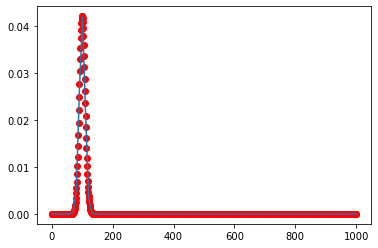

In [56]:
n, p = 1000, .1

# Support of the binomial random variable.
k = np.arange(n)
# Plot binomial PMF with red dots.
plt.plot(k, binom.pmf(k, n, p), 'ro')
# Create a finer domain for plotting a smoother Gaussian PDF.
x = np.linspace(0, n, 100)
# Plot smooth curve of Gaussian PDF.
plt.plot(x, gaussian.pdf(x, n*p, np.sqrt(n*p*(1-p))))